<a href="https://colab.research.google.com/github/yurifillippo/Analises-Exploratorias-e-Python/blob/master/Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rede Neural**

In [ ]:
#Importar bibliotecas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [ ]:
#Importar dataset
df = datasets.load_iris()
previsores = df.data
classe = df.target

In [ ]:
#Transformar classe em formato Dummy (Cada entrada da classe em uma coluna)
class_dummy = np_utils.to_categorical(classe)
class_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
#Dividir dados entre treino e teste
X_train, X_teste, y_train, y_teste = train_test_split(previsores, class_dummy, test_size = 0.3, random_state=0)

In [ ]:
#Criar estrutura da Rede Neural
modelo = Sequential()

#Primeira camada oculta = aleatóriamente escolhido 5 neurônios e 4 neurônios de entrada(significa entradas que tem relevância com a classe)
modelo.add(Dense(units = 5, input_dim = 4))

#Segunda camada oculta = 
modelo.add(Dense(units =  4))

#Terceira camada oculta
##Função softmax pois, temos um problema de classificação com mais de duas classes(gera uma probabilidade em cada neurônio)
modelo.add(Dense(units = 3 , activation='softmax'))

In [ ]:
#Visualizar estrutura da rede neural
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 15        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configurar parâmetros da rede neural(adam = algoritimo para atualizar pesos e loss = cálculo de erros)
modelo.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Treinar modelo 
modelo.fit(X_train, y_train, epochs=1000, validation_data=(X_teste, y_teste))

Epoch 1/1000
4/4 [==============================] - 0s 34ms/step - loss: 1.3197 - accuracy: 0.1048 - val_loss: 1.2300 - val_accuracy: 0.1778
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.2575 - accuracy: 0.2000 - val_loss: 1.1706 - val_accuracy: 0.2222
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.2217 - accuracy: 0.2190 - val_loss: 1.1264 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1922 - accuracy: 0.2476 - val_loss: 1.0943 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1639 - accuracy: 0.2571 - val_loss: 1.0685 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1348 - accuracy: 0.2762 - val_loss: 1.0441 - val_accuracy: 0.4000
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1102 - accuracy: 0.3143 - val_loss: 1.0207 - val_accuracy: 0.4444
Epoch 8/1000
4/4 [=

KeyboardInterrupt: ignored

In [ ]:
#Realizar previsoes e lógica para, trazer True quando resultado > 0.5 e false para <
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

In [ ]:
#Como é um problema com 3 tipos de saídas buscamos a previsao que possui maior valor
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_prev_matrix = [np.argmax(t) for t in previsoes]

In [ ]:
#Gerar matriz de confusão
conf = confusion_matrix(y_teste_matrix, y_prev_matrix)
conf

# **Deep Learning**

In [ ]:
pip install tensorflow -q

In [ ]:
#Importar bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [ ]:
#Importar dados e dividir automaticamente entre treino e teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, '5')

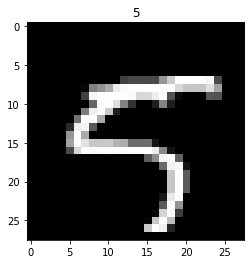

In [ ]:
#Ver imagem do dataset
plt.imshow(X_train[610], cmap = 'gray');
plt.title(y_train[610])

In [ ]:
#Mudar dimensão, original está 28x28 e precisamos de 784
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [ ]:
#Transformar dados para tipo float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalizar dados, 255 é o valor máximo de um pixel
X_train /= 255
X_test /= 255

In [ ]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Transformar classe para o formato Dummy
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
#Estrutura de rede neural 784 - 64 - 64 - 64 - 10
#Dropout é utilizado para zerar uma porcentagem dos neurônios e evitar overfiting
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim = 784 ))
model.add(Dropout(.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(.2))
#Camada de saída - utilizar softmax para obter porcentagem da probabilidade do resultado correto
model.add(Dense(units=10, activation='softmax'))

In [ ]:
#Visualizar estrutura da Rede Neural
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

In [ ]:
#Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
model.compile(optimizer ='adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4477 - accuracy: 0.8638 - val_loss: 0.1595 - val_accuracy: 0.9526
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2315 - accuracy: 0.9325 - val_loss: 0.1447 - val_accuracy: 0.9554
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1913 - accuracy: 0.9450 - val_loss: 0.1170 - val_accuracy: 0.9657
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1668 - accuracy: 0.9505 - val_loss: 0.1104 - val_accuracy: 0.9667
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1559 - accuracy: 0.9551 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1438 - accuracy: 0.9562 - val_loss: 0.1016 - val_accuracy: 0.9703
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1334 - accuracy: 0.9600 - val_loss: 0.1128 - val_accuracy:

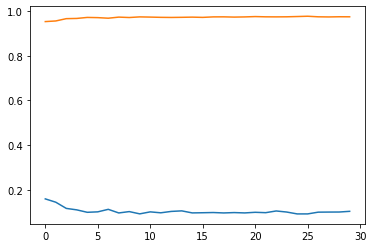

In [ ]:
#Gráfico para visualizar erros e acurácia
hist.history.keys()
#Evolução do erro (azul)
plt.plot(hist.history['val_loss'])
#Performance da rede
plt.plot(hist.history['val_accuracy'])

In [ ]:
#Realizar previsão
prev = model.predict(X_test)

In [ ]:
#Matriz de confusão (convertendo de array para matriz)
y_test_matriz = [np.argmax(t) for t in y_test]
y_pred_matriz = [np.argmax(t) for t in prev]

#Gerar matriz
confusao = confusion_matrix(y_test_matriz,y_pred_matriz)
confusao

array([[ 969,    1,    1,    1,    0,    1,    2,    2,    2,    1],
       [   0, 1123,    4,    1,    0,    1,    3,    1,    2,    0],
       [   1,    2, 1015,    2,    5,    0,    1,    3,    3,    0],
       [   0,    0,    4,  987,    1,    8,    0,    3,    5,    2],
       [   0,    0,    6,    0,  960,    0,    0,    2,    2,   12],
       [   2,    0,    0,    8,    1,  871,    4,    0,    4,    2],
       [   5,    3,    1,    1,    8,    6,  931,    0,    3,    0],
       [   2,    6,   11,    7,    2,    0,    0,  991,    0,    9],
       [   7,    3,   12,    8,    4,    6,    3,    2,  924,    5],
       [   1,    5,    1,    6,   14,    6,    1,    3,    3,  969]])

In [ ]:
#Realizar previsão de um novo registro
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Criar novo df
df_novo = X_train[20]
#Transformar de matriz para vetor
df_novo = np.expand_dims(df_novo, axis = 0)
#Realizar previsão
previsao = model.predict(df_novo)
#Avaliar modelo
previsao = [np.argmax(previsao) for t in previsao]
previsao

[4]

# **Deep Learning ||**

In [ ]:
#Instalar biblioteca
pip install tensorflow -q

In [ ]:
#Instalar bibliotecas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
#Definir dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science com Python Udemy/34.Prática em Python/dados/Credit2.csv', sep=';')
df

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,good
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,bad
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,good
3,4,<0,existing paid,42,7882,2,4,45,1,2,good
4,5,<0,delayed previously,24,4870,3,4,53,2,2,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,existing paid,12,1736,3,4,31,1,1,good
996,997,<0,existing paid,30,3857,4,4,40,1,1,good
997,998,no checking,existing paid,12,804,4,4,38,1,1,good
998,999,<0,existing paid,45,1845,4,4,23,1,1,bad


In [ ]:
df = df.drop(['ID'], axis=1)
#Transformar DataFrame em array
X = df.iloc[:,0:9].values
y = df['class'].values

In [ ]:
#Label encoder na variável cheking_status > até 3 tipos de entradas
LbEncoder = LabelEncoder()
X[:,0] = LbEncoder.fit_transform(X[:,0])

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8
0,1,critical/other existing credit,6,1169,4,4,67,2,1
1,0,existing paid,48,5951,2,2,22,1,1
2,3,critical/other existing credit,12,2096,2,3,49,1,2
3,1,existing paid,42,7882,2,4,45,1,2
4,1,delayed previously,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...,...
995,3,existing paid,12,1736,3,4,31,1,1
996,1,existing paid,30,3857,4,4,40,1,1
997,3,existing paid,12,804,4,4,38,1,1
998,1,existing paid,45,1845,4,4,23,1,1


In [ ]:
#OneHotEncoder na variável credit_history >> mais de 3 tipos de entradas
onehot = make_column_transformer((OneHotEncoder(categories='auto', sparse=False), [1]), remainder = 'passthrough')
X = onehot.fit_transform(X)

In [ ]:
#EXcluir uma das variáveis criada no OneHotEncoder para evitar dummy variable
X = X[:,1:]

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,1,6,1169,4,4,67,2,1
1,0,0,1,0,0,48,5951,2,2,22,1,1
2,1,0,0,0,3,12,2096,2,3,49,1,2
3,0,0,1,0,1,42,7882,2,4,45,1,2
4,0,1,0,0,1,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,3,12,1736,3,4,31,1,1
996,0,0,1,0,1,30,3857,4,4,40,1,1
997,0,0,1,0,3,12,804,4,4,38,1,1
998,0,0,1,0,1,45,1845,4,4,23,1,1


In [ ]:
#Label Encoder com a Classe
LbEncoder = LabelEncoder()
y = LbEncoder.fit_transform(y)

In [ ]:
#Dividir dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)
print(len(X_train),len(X_test),len(y_train),len(y_test))

800 200 800 200


In [ ]:
#Padronizar os dados (deixar em escala entre 0 e 1) utilizando StandardScaler
sc = StandardScaler()

In [ ]:
#Padronizar os dados (deixar em escala entre 0 e 1) utilizando StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Criar rede neural
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=12))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))

#Definir parâmetros
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Treinar rede neural
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
80/80 [==============================] - 0s 889us/step - loss: 3.4023 - accuracy: 0.3025
Epoch 2/1000
80/80 [==============================] - 0s 885us/step - loss: 2.2585 - accuracy: 0.3025
Epoch 3/1000
80/80 [==============================] - 0s 829us/step - loss: 1.3988 - accuracy: 0.3025
Epoch 4/1000
80/80 [==============================] - 0s 872us/step - loss: 0.9034 - accuracy: 0.3525
Epoch 5/1000
80/80 [==============================] - 0s 964us/step - loss: 0.6346 - accuracy: 0.6275
Epoch 6/1000
80/80 [==============================] - 0s 894us/step - loss: 0.5350 - accuracy: 0.7212
Epoch 7/1000
80/80 [==============================] - 0s 849us/step - loss: 0.5170 - accuracy: 0.7387
Epoch 8/1000
80/80 [==============================] - 0s 897us/step - loss: 0.5255 - accuracy: 0.7425
Epoch 9/1000
80/80 [==============================] - 0s 849us/step - loss: 0.5222 - accuracy: 0.7387
Epoch 10/1000
80/80 [==============================] - 0s 901us/step - loss: 0.519

In [ ]:
#Realizar previsão e transformar resultado em True e False
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
#Criar matriz de confusão
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 27,  31],
       [ 26, 116]])

# **Faça Você Mesmo** 

Criar Rede Neural para resolver problema de classificação

In [ ]:
pip install tensorflow -q

In [ ]:
#Instalar Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science com Python Udemy/34.Prática em Python/dados/soybean.csv')
df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external-decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,no,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


## **Estudo das variáveis**

In [ ]:
#Ver tamanho do dataset
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 683
Variáveis: 36


In [ ]:
#Separar classe do dataset
y = df['class']
df = df.drop(['class'], axis=1)

In [ ]:
#Realizar LabelEncoder nas variáveis
for i in range (0,35):
  LbEncoder = LabelEncoder()
  df[df.columns[i]] = LbEncoder.fit_transform(df[df.columns[i]])

In [ ]:
#dividir dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size = 0.3)

In [ ]:
#Instanciar e treinar modelo
modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Realizar previsões
y_pred = modelo.predict(X_test)

In [ ]:
confusao = confusion_matrix(y_test, y_pred)
confusao

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0

In [ ]:
taxa_acerto = accuracy_score(y_test, y_pred)
taxa_acerto

0.9463414634146341